In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data=load_iris()
x=data.data
y=data.target.reshape(1,x.shape[0])
shuff=list(np.random.permutation(x.shape[0]))
x=x[shuff,:].T
y=y[:,shuff]

#normalizing
x=x-(np.sum(x,axis=0)/x.shape[0])
sigma2=np.sum(x**2,axis=0)/x.shape[0]
x=x/sigma2
x.shape
y.shape

(1, 150)

In [22]:
temp=np.append(x,y).reshape(150,5)
df=pd.DataFrame(temp)
vis=df.corr()
vis.style.background_gradient(cmap="coolwarm")

,0,1,2,3,4
0,1,0.0541397,-0.112357,-0.822153,-0.279852
1,0.0541397,1,-0.982036,0.0754599,-0.919568
2,-0.112357,-0.982036,1,-0.124737,0.924394
3,-0.822153,0.0754599,-0.124737,1,0.0973805
4,-0.279852,-0.919568,0.924394,0.0973805,1


In [23]:
x.shape

(4, 150)

          0         1         2         3         4
0  1.000000  0.054140 -0.112357 -0.822153 -0.279852
1  0.054140  1.000000 -0.982036  0.075460 -0.919568
2 -0.112357 -0.982036  1.000000 -0.124737  0.924394
3 -0.822153  0.075460 -0.124737  1.000000  0.097381
4 -0.279852 -0.919568  0.924394  0.097381  1.000000


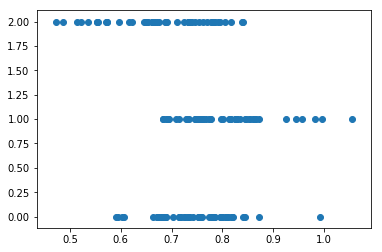

In [24]:
df=pd.DataFrame(np.corrcoef(x,y))
print(df)

plt.scatter(x[0,:],y)
plt.show()

In [18]:
x_train=x[:,:125].reshape(4,125)
y_train=y[:125].reshape(1,125)
x_test=x[:,125:].reshape(4,25)
y_test=y[125:].reshape(1,25)

In [7]:
y_t1=np.zeros((x_train.shape[1],3))
y_t1[np.arange(x_train.shape[1]),y_train]=1

y_t2=np.zeros((x_test.shape[1],3))
y_t2[np.arange(x_test.shape[1]),y_test]=1


In [8]:
"""def relu_derivative(z):
    temp=np.zeros(z.shape)
    temp[z>0]=1
    return temp"""

'def relu_derivative(z):\n    temp=np.zeros(z.shape)\n    temp[z>0]=1\n    return temp'

In [10]:
learning_rate=0.0355
lambd=0.075
iter=5000
cost_cache=[]

w1=np.random.rand(50,4) * np.sqrt(2/x_train.shape[0])
b1=np.zeros((50,1))
w2=np.random.rand(70,50)*np.sqrt(2/w1.shape[1])
b2=np.zeros((70,1))
w3=np.random.rand(3,70) * np.sqrt(1/w2.shape[1])
b3=np.zeros((3,1))
m=x_train.shape[1]


for i in range(iter):
    #for prop
    z1=np.dot(w1,x_train)+b1
    a1=np.maximum(0,z1)
    z2=np.dot(w2,a1)+b2
    a2=np.maximum(0,z2)
    z3=np.dot(w3,a2)+b3
    a3=np.exp(z3)/np.sum(np.exp(z3),axis=0)

    logprobs = np.multiply(-np.log(a3),y_t1.T)
    cost = 1./m * np.nansum(logprobs)+(lambd/(2*m))*(np.sum(w1**2)+np.sum(w2**2)+np.sum(w3**2))
    cost_cache.append(cost)
    if i%100==0:
        print("cost after "+str(i)+" iteration is : "+str(cost))

    #back prop
    dz3=(a3-y_t1.T)
    dw3=(np.dot(dz3,a2.T)+(lambd)*w3)/m
    db3=np.sum(dz3,axis=1,keepdims=True)/m
    w3=w3-learning_rate*dw3
    b3=b3-learning_rate*db3

    dz2=np.dot(dw3.T,dz3)*np.int64(z2>0)
    dw2=(np.dot(dz2,a1.T)+(lambd)*w2)/m
    db2=np.sum(dz2,axis=1,keepdims=True)/m
    w2=w2-learning_rate*dw2
    b2=b2-learning_rate*db2

    dz1=np.dot(dw2.T,dz2)*np.int64(z1>0)
    dw1=(np.dot(dz1,x_train.T)+(lambd)*w1)/m
    db1=np.sum(dz1,axis=1,keepdims=True)/m

    w1=w1-learning_rate*dw1
    b1=b1-learning_rate*db1
    
parameters={"w1":w1,
            "b1":b1,
            "w2":w2,
            "b2":b2,
            "w3":w3,
            "b3":b3
}    

"""print("w1 :"+str(w1))
print("b1 :"+str(b1))
print("w2 :"+str(w2))
print("b2 :"+str(b2))
print("w3 :"+str(w3))
print("b3 :"+str(b3))"""

cost after 0 iteration is : 1.3553445112220763
cost after 100 iteration is : 0.9051470128752044
cost after 200 iteration is : 0.8008658674762856
cost after 300 iteration is : 0.7453021152942547
cost after 400 iteration is : 0.7089029145991479
cost after 500 iteration is : 0.682236164801178
cost after 600 iteration is : 0.661319239734673
cost after 700 iteration is : 0.6441599080406717
cost after 800 iteration is : 0.6296391594349774
cost after 900 iteration is : 0.6170727367224421
cost after 1000 iteration is : 0.6060141445605158
cost after 1100 iteration is : 0.5961558110782139
cost after 1200 iteration is : 0.5872774502498778
cost after 1300 iteration is : 0.5792155755996796
cost after 1400 iteration is : 0.5718453283362962
cost after 1500 iteration is : 0.5650690928606773
cost after 1600 iteration is : 0.558808838917276
cost after 1700 iteration is : 0.5530011876335484
cost after 1800 iteration is : 0.5475938901958118
cost after 1900 iteration is : 0.5425434189188902
cost after 2000

'print("w1 :"+str(w1))\nprint("b1 :"+str(b1))\nprint("w2 :"+str(w2))\nprint("b2 :"+str(b2))\nprint("w3 :"+str(w3))\nprint("b3 :"+str(b3))'

In [11]:
def predict(x,parameters):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]
    w3=parameters["w3"]
    b3=parameters["b3"]
    
    z1=np.dot(w1,x)+b1
    a1=np.maximum(0,z1)
    z2=np.dot(w2,a1)+b2
    a2=np.maximum(0,z2)
    z3=np.dot(w3,a2)+b3
    a3=np.exp(z3)/np.sum(np.exp(z3),axis=0)

    l=np.argmax(a3,axis=0)
    return l;

print("Train Accuracy : "+str(np.mean(predict(x_train,parameters)==y_train)*100)+" %")
print("Test Accuracy : "+str(np.mean(predict(x_test,parameters)==y_test)*100)+" %")

Train Accuracy : 94.39999999999999 %
Test Accuracy : 96.0 %


In [12]:
import matplotlib.pyplot as plt
i=np.arange(iter)
#c=cost_cache[2000:2100:2]

Text(0.5,1,'cost showing')

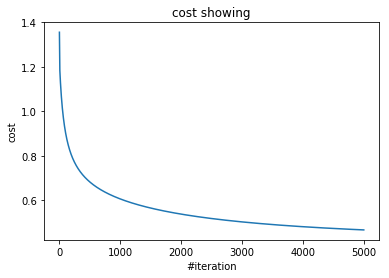

In [13]:
plt.plot(i,cost_cache)
plt.xlabel("#iteration")
plt.ylabel("cost")
plt.title("cost showing")

In [14]:
import scipy
from scipy import ndimage

In [16]:
num_px=4
fname="H:\image\images.jpg"
image = np.array(ndimage.imread(fname, flatten=True))
#my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
pre=predict(my_image,parameters)


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: shapes (50,4) and (6912,1) not aligned: 4 (dim 1) != 6912 (dim 0)